# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pyplot import text
from google.colab import data_table
data_table.enable_dataframe_formatter()
# for fitting
# from numpy import arange
# from scipy.optimize import curve_fit

In [3]:
file_path = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/data_results.xlsx"
df = pd.read_excel(file_path,sheet_name='fitted_data',index_col='PAR([mmol (photons) m-2 s-1])')
df

FileNotFoundError: ignored

## Average data
Create new df with the average A for each species

In [ ]:
species = ['Tradescantia', 'Peperomia','Monalisa','Philodendron','Chlorophytum','Sphatophilum']
colors_dict = {'Tradescantia':"deeppink", 'Peperomia':"lime",'Monalisa':"red",'Philodendron':"forestgreen",'Chlorophytum':"cyan",'Sphatophilum':"Orange"}
ax_dict = {'Tradescantia':0, 'Peperomia':1,'Monalisa':2,'Philodendron':3,'Chlorophytum':4,'Sphatophilum':5}
ax_dict_a = {'Tradescantia':"a", 'Peperomia':"b",'Monalisa':"c",'Philodendron':'d','Chlorophytum':"e",'Sphatophilum':"f"}

In [ ]:
df_species_avg = pd.DataFrame()
for plant_name in species:
    df_species_avg[plant_name + '_avg'] =df[[column for column in df.columns if plant_name in column]].mean(axis=1)
    df_species_avg[plant_name + '_std'] =df[[column for column in df.columns if plant_name in column]].std(axis=1)
df_species_avg.to_csv("/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/Avg_data.csv")

In [ ]:
df_species_avg

,Tradescantia_avg,Tradescantia_std,Peperomia_avg,Peperomia_std,Monalisa_avg,Monalisa_std,Philodendron_avg,Philodendron_std,Chlorophytum_avg,Chlorophytum_std,Sphatophilum_avg,Sphatophilum_std
PAR([mmol (photons) m-2 s-1]),,,,,,,,,,,,
0,-1.405576,0.511063,-0.164607,0.404296,-0.000005,0.000003,-0.055887,0.110056,-0.000013,0.000004,-0.065058,0.195125
1,-1.320715,0.483073,-0.116869,0.353901,0.046275,0.034353,0.031530,0.162388,0.132755,0.043313,0.100495,0.188413
2,-1.237879,0.456262,-0.071129,0.311044,0.091728,0.067602,0.108523,0.214236,0.262728,0.085051,0.259323,0.191176
3,-1.156995,0.430620,-0.027228,0.276652,0.136383,0.099794,0.177626,0.261396,0.390000,0.125292,0.411923,0.201721
4,-1.077992,0.406144,0.014977,0.251814,0.180269,0.130979,0.240503,0.304145,0.514664,0.164116,0.558732,0.218068
...,...,...,...,...,...,...,...,...,...,...,...,...
996,4.793392,1.315364,4.263892,1.780278,6.424106,1.782820,2.505407,1.231054,11.565989,3.598031,5.725855,2.456960
997,4.793310,1.315337,4.264614,1.780808,6.424219,1.782944,2.505340,1.230939,11.565901,3.598297,5.722411,2.455946
998,4.793227,1.315309,4.265334,1.781338,6.424329,1.783068,2.505273,1.230823,11.565809,3.598562,5.718966,2.454936


## Plots

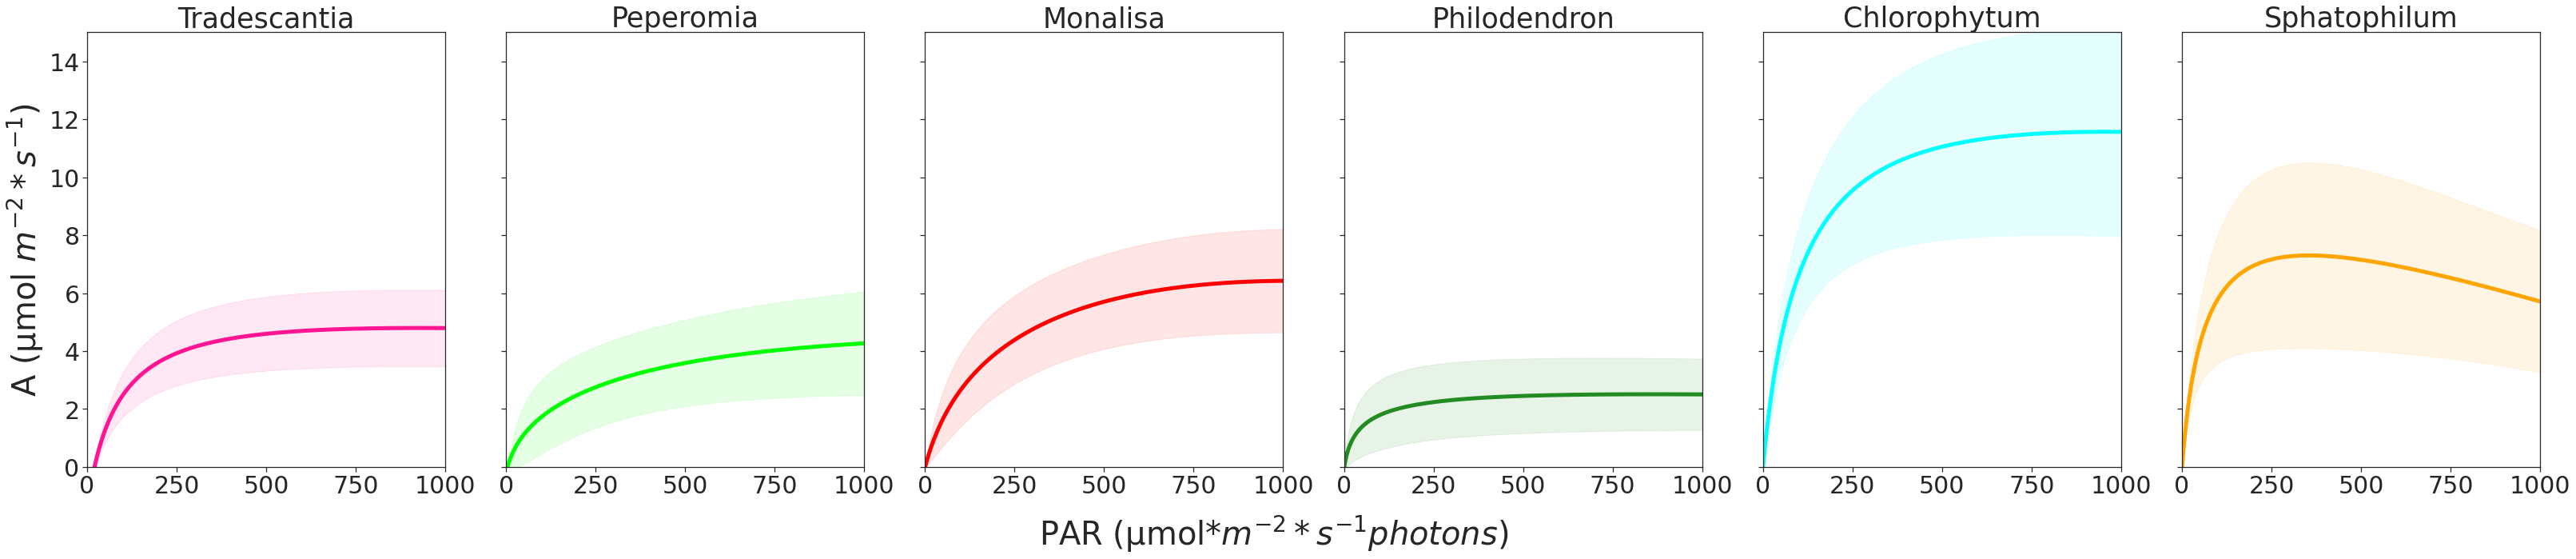

In [ ]:
fig, axes = plt.subplots(1, 6,sharex=True, figsize=(55,10))
for plant_name in species:
    a = sns.lineplot(ax=axes[ax_dict[plant_name]],data=df_species_avg, x=df_species_avg.index, y=plant_name+'_avg', color= colors_dict[plant_name],linewidth=5)
    a.fill_between(df_species_avg.index, df_species_avg[plant_name+'_avg'] + df_species_avg[plant_name+'_std'], df_species_avg[plant_name+'_avg']-df_species_avg[plant_name+'_std'],color=colors_dict[plant_name], alpha=.1
                  )
    a.set_title(plant_name,fontsize=35)
    a.set_xlabel(" ")
    a.set_ylabel('A (µmol $m^{-2}*s^{-1}$)',fontsize=40)
    a.set_ylim(0,15)
    a.set_xlim(0,1000)
    a.label_outer() # for 1 y label
    a.xaxis.set_tick_params(labelsize=30)
    a.yaxis.set_tick_params(labelsize=30)
fig.text(0.5, 0.01, 'PAR (µmol$*m^{-2}*s^{-1} photons)$', va='center', ha='center', fontsize=40)
plt.subplots_adjust(hspace = .5,wspace=.17) #adjust the borders between the graph
save_results_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/Figures/"
plt.savefig(save_results_to +'subplots.png',bbox_inches = "tight")

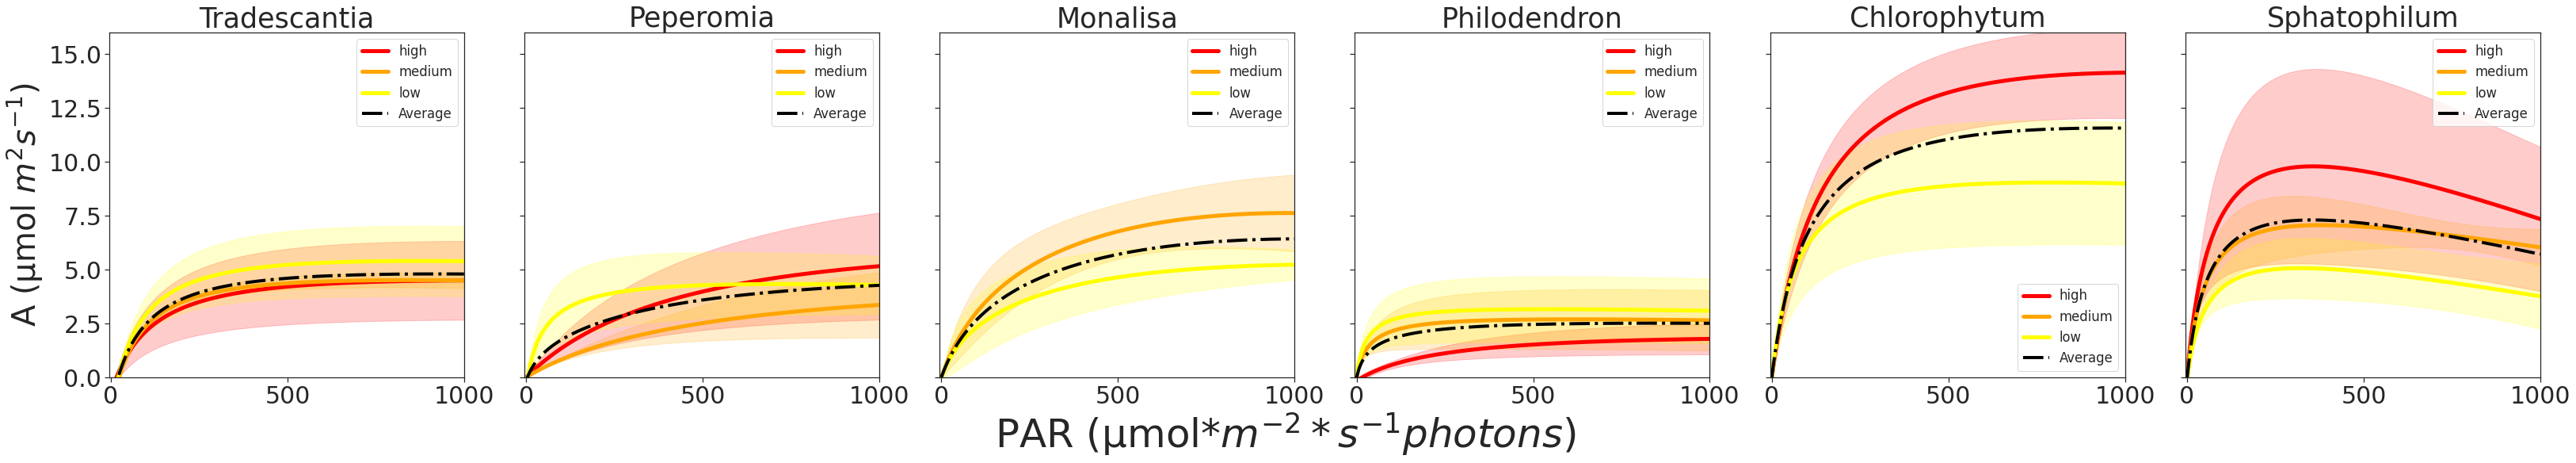

In [ ]:
light_levels = ['high', 'medium', 'low']
light_dict = {'low':'yellow', 'medium': "orange", 'high': "red"}
fig, axes = plt.subplots(1, 6,sharex=True, figsize=(55,8))
for plant_name in species:
    df_light_avg = pd.DataFrame()
    for level in light_levels:
        df_light_avg[level + "_avg"] =df[[column for column in df.columns if plant_name in column and level in column]].mean(axis=1)
        df_light_avg[level + '_std'] =df[[column for column in df.columns if plant_name in column and level in column]].std(axis=1)
        
        a = sns.lineplot(ax=axes[ax_dict[plant_name]],data=df_light_avg, x=df_species_avg.index, y=level + "_avg", color= light_dict[level],linewidth=5,label=level)
        a.fill_between(df_light_avg.index, df_light_avg[level+"_avg"] + df_light_avg[level+'_std'], df_light_avg[level+"_avg"]-df_light_avg[level+'_std'],color=light_dict[level], alpha=.2 )
    a = sns.lineplot(ax=axes[ax_dict[plant_name]],data=df_species_avg, x=df_species_avg.index, y=plant_name+'_avg', color= "black",linewidth=4,linestyle = "dashdot",label="Average")
    a.set_title(plant_name,fontsize=35)
    a.set_xlabel(" ")
    a.set_ylabel('A (µmol $m^2 s^{-1}$)',fontsize=40)
    a.set_ylim(0,16)
    a.set_xlim(-5,1000)
    a.label_outer() # for 1 y label
    a.xaxis.set_tick_params(labelsize=30)
    a.yaxis.set_tick_params(labelsize=30)
plt.legend(loc='best')
fig.text(0.5, 0.001, 'PAR (µmol$*m^{-2}*s^{-1} photons)$', va='center', ha='center', fontsize=50)
plt.subplots_adjust(hspace = .5,wspace=.17) #adjust the borders between the graph

save_results_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/Figures/"
plt.savefig(save_results_to +'_all_togather.png',bbox_inches = "tight")

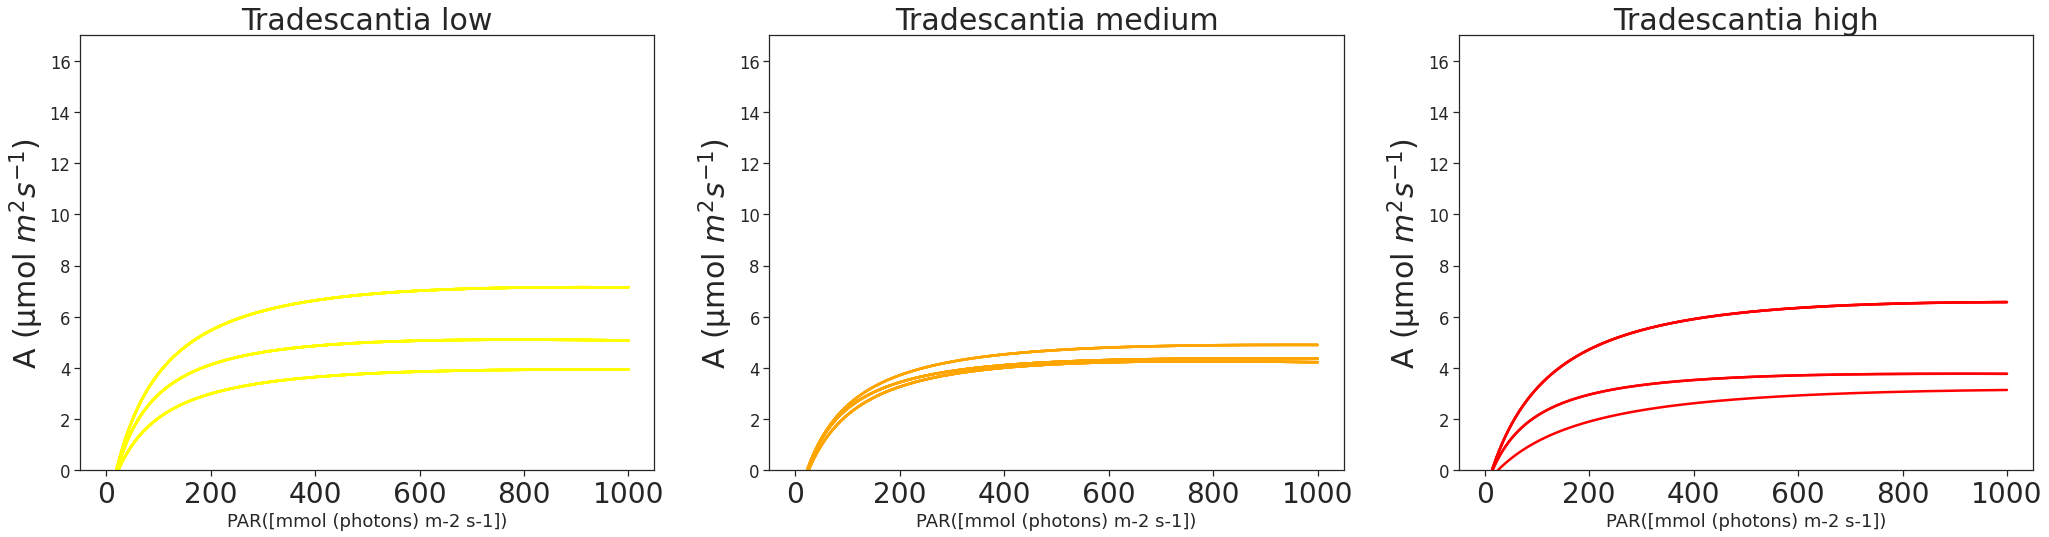

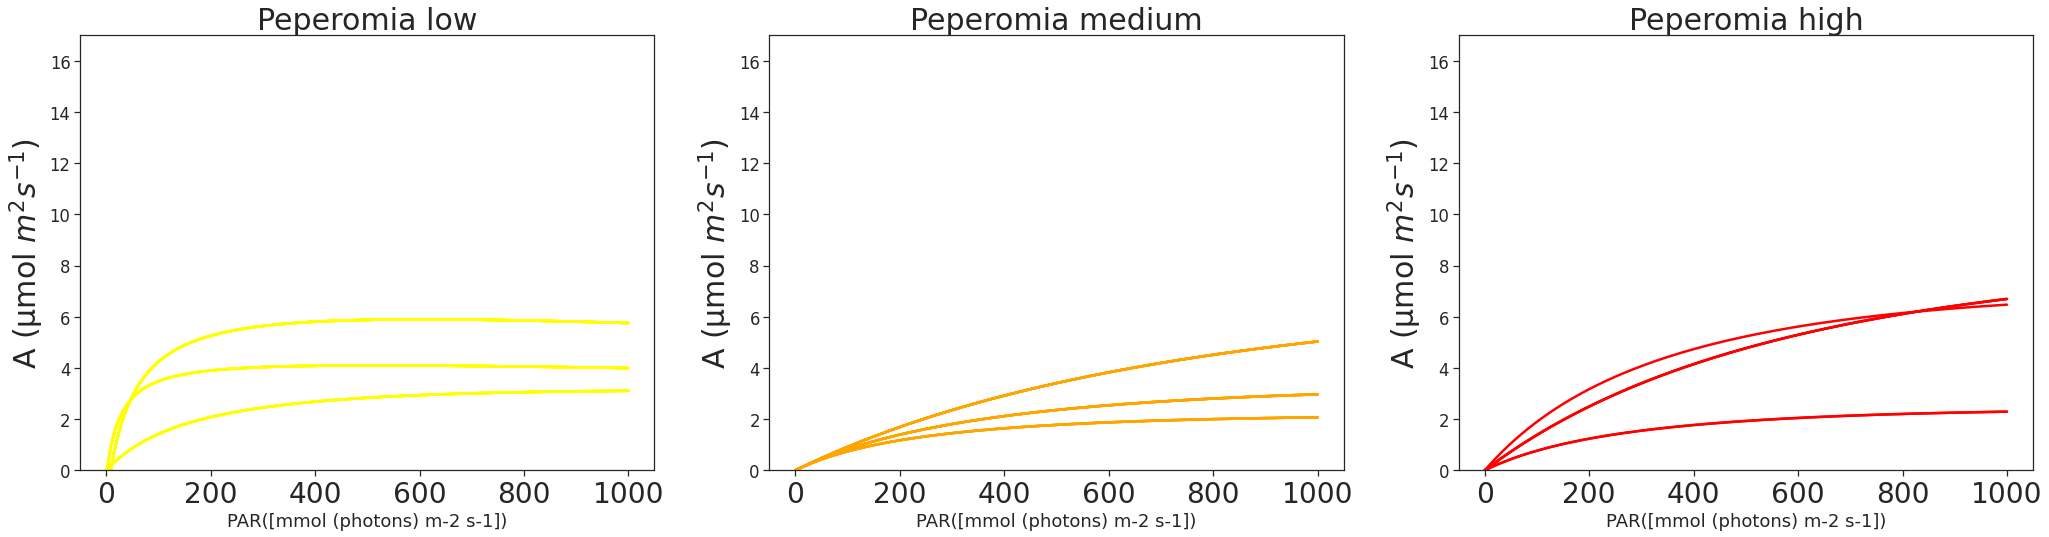

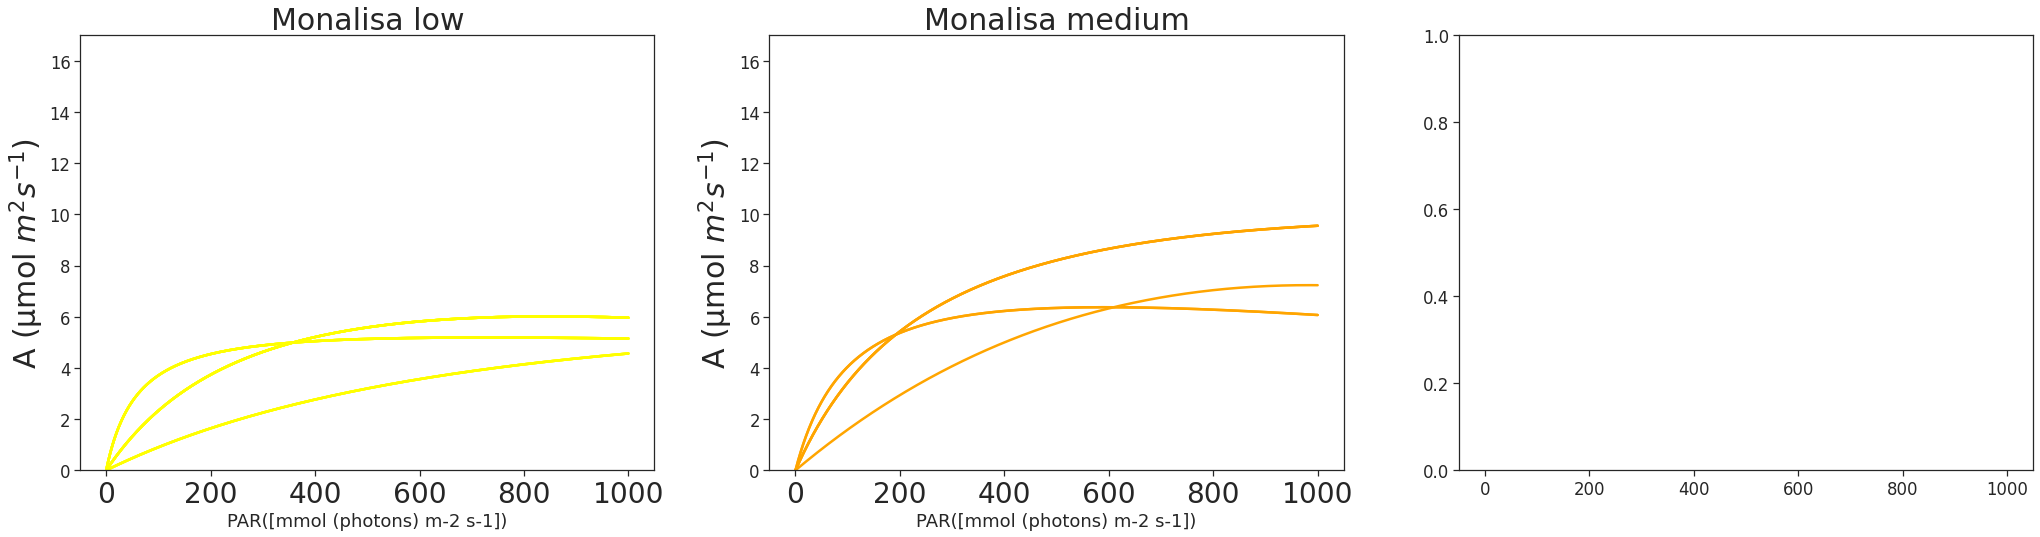

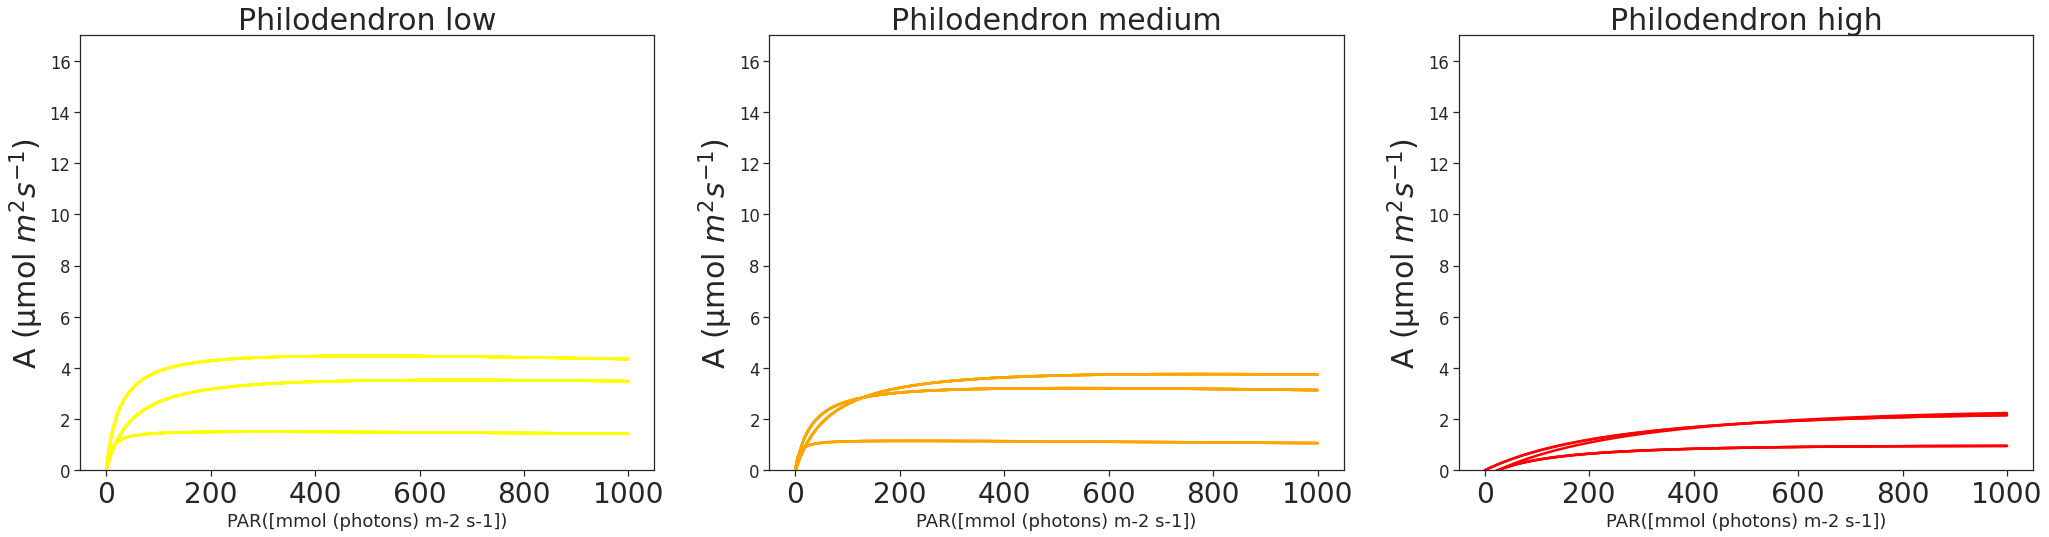

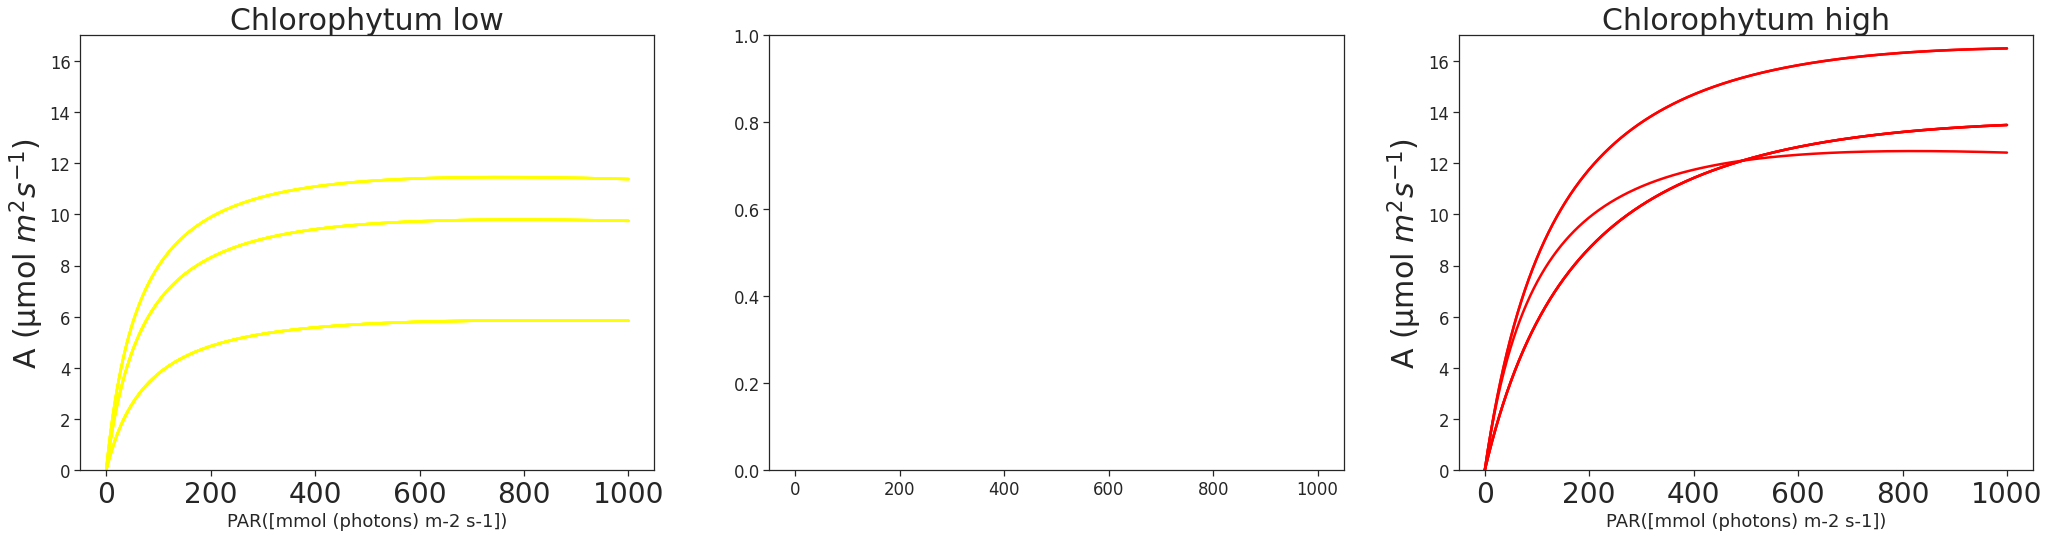

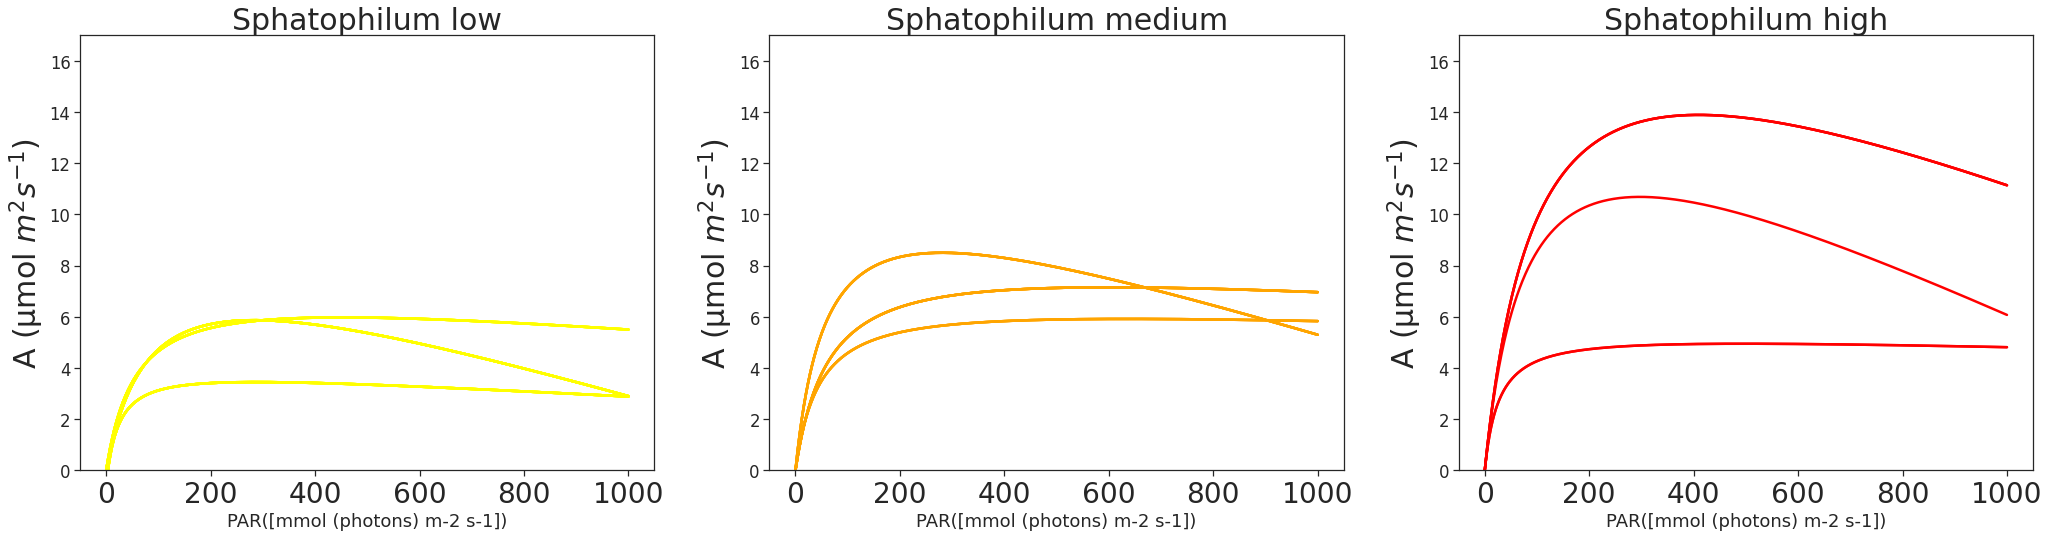

In [ ]:
graph_dict = {'low':0, 'medium': 1, 'high': 2}
for plant_name in species:
    df_species = pd.DataFrame(index = df_species_avg.index)
    fig, axes = plt.subplots(1, 3,sharex=True, figsize=(35,8))
    for column in df.columns:
        if plant_name in column:
          df_species[column] = df[column]
# untill now i create a seperate df for each species with all his samples. now i want to plot al the curves and saperate
# between the light regions with different color
          for column_name in df_species.columns:
              for level in light_levels:
                  if level in column_name:
                      ax = sns.lineplot(ax=axes[graph_dict[level]],x=df_species.index, y=column_name, data=df_species, color=light_dict[level],lw=2.5)
                      ax.set_title(plant_name+ " "+ level,fontsize=30)
                      ax.set_ylim(0,17)
                      ax.set_ylabel('A (µmol $m^{-2} s^{-1}$)',fontsize=30)
                      ax.xaxis.set_tick_params(labelsize=28)
    save_results_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/Figures/"
    plt.savefig(save_results_to + plant_name+'.png',bbox_inches = "tight")

## Parameters Analysis

In [ ]:
file_path = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/data_results.xlsx"
df_parameters = pd.read_excel(file_path,sheet_name='parameters',index_col='Parameter')
df_parameters

,Tradescantia_low_1,Tradescantia_low_2,Tradescantia_low_3,Tradescantia_medium_1,Tradescantia_medium_2,Tradescantia_medium_3,Tradescantia_high_1,Tradescantia_high_2,Tradescantia_high_3,Peperomia_low_1,...,Philodendron_medium_3,Philodendron_high_1,Philodendron_high_2,Philodendron_high_3,Chlorophytum_low_1,Chlorophytum_low_2,Chlorophytum_low_3,Chlorophytum_high_1,Chlorophytum_high_2,Chlorophytum_high_3
Parameter,,,,,,,,,,,,,,,,,,,,,
f(Io_Icomp) =,0.102144,0.095031,0.060023,0.077275,0.062299,0.073335,0.068655,0.055848,0.023427,0.140746,...,0.200000,0.010000,0.010000,0.010000,0.083315,0.156314,0.200000,0.086504,0.139191,0.139873
b =,0.000108,0.000120,0.000100,0.000107,0.000154,0.000100,0.000100,0.000100,0.000100,0.000138,...,0.000119,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000132
g =,0.011497,0.015136,0.012394,0.014478,0.011168,0.012167,0.008268,0.012130,0.005546,0.019899,...,0.164818,0.008201,0.003181,0.002916,0.011826,0.013426,0.014810,0.004767,0.006596,0.008775
Icomp =,19.595004,20.756533,23.042954,22.599155,25.000000,22.278476,13.730153,14.810699,25.000000,8.648567,...,0.000100,25.000000,0.000100,25.000000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100
Light saturation point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isat =,912.430303,788.180359,941.873327,861.408278,779.491178,944.103191,1046.559654,907.762564,1265.388141,605.939904,...,220.014720,1097.595388,1486.235552,1607.765283,838.898729,791.745401,756.975458,1253.675556,1088.980471,821.867376
Isat(50) =,92.694701,81.273523,95.386941,87.139621,97.586215,95.058067,103.581608,83.347897,151.074210,51.319510,...,5.471475,121.456278,174.997120,221.520736,60.899285,54.632160,50.204648,128.294332,98.988399,74.506791
Isat(85) =,275.076681,234.849853,279.104897,252.726721,265.227356,279.654764,321.515998,259.380579,434.233685,164.366492,...,25.537146,351.734130,538.235498,617.387359,221.143040,201.488404,187.367552,415.429902,334.085618,251.691435
Isat(90) =,344.395870,293.985253,349.884413,317.027821,325.388094,350.705415,402.600810,327.795659,533.826589,209.383187,...,36.257122,436.407079,659.133633,746.483389,284.611431,260.650017,243.351077,516.168311,420.198814,316.654626


In [ ]:
df_parm_avg = pd.DataFrame(index = df_parameters.index)
for plant_name in species:
    df_parm_avg[plant_name + '_avg'] =df_parameters[[column for column in df_parameters.columns if plant_name in column]].mean(axis=1)
    df_parm_avg[plant_name + '_std'] =df_parameters[[column for column in df_parameters.columns if plant_name in column]].std(axis=1)
df_parm_avg.to_csv("/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/Avg_parameters.csv")
df_parm_avg

,Tradescantia_avg,Tradescantia_std,Peperomia_avg,Peperomia_std,Monalisa_avg,Monalisa_std,Philodendron_avg,Philodendron_std,Chlorophytum_avg,Chlorophytum_std,Sphatophilum_avg,Sphatophilum_std
Parameter,,,,,,,,,,,,
f(Io_Icomp) =,0.068671,0.023016,0.045033,0.061210,0.046704,3.492747e-02,0.093491,0.077467,0.134199,0.044136,0.166295,0.036261
b =,0.000110,0.000018,0.000104,0.000013,0.000207,1.358353e-04,0.000102,0.000006,0.000105,0.000013,0.000341,0.000221
g =,0.011421,0.002951,0.008165,0.011911,0.005399,6.056705e-03,0.043178,0.055813,0.010033,0.003967,0.020356,0.011582
Icomp =,20.756997,4.077766,1.140559,2.865758,0.000100,2.624420e-14,5.557386,11.022927,0.000100,0.000000,0.370892,1.112375
Light saturation point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isat =,938.577444,147.488482,1506.609539,669.256872,1157.421863,6.506221e+02,796.740521,498.220445,925.357165,199.476942,416.290567,140.304991
Isat(50) =,98.571420,20.920369,203.467119,138.090872,179.083819,1.299826e+02,74.565043,78.983301,77.920936,30.309305,37.149207,9.976085
Isat(85) =,289.085615,59.392330,584.965796,350.568533,483.468044,3.204479e+02,234.738048,218.075764,268.534325,88.868555,122.361436,29.362867
Isat(90) =,360.623325,71.500767,705.869131,406.492663,575.209554,3.716480e+02,294.009365,261.198316,340.272379,106.505411,153.895753,36.963585


### Anova test and Tucky HSD

In [ ]:
import scipy
from scipy import stats

In [ ]:
# keep with relevant columns
stat_df = df_parameters.T
stat_df = stat_df[["Imax =","PN(Imax) = ", "RD =","Icomp ="]]
stat_df["50"] =df.loc[50]
stat_df["100"] =df.loc[100]
# Create column just with plant name for anova
stat_df["species"] = 1
for value in stat_df.index.values:
    for plant in species:
      if plant in value:
        stat_df["species"].loc[value] = plant
stat_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Parameter,Imax =,PN(Imax) =,RD =,Icomp =,50,100,species
Tradescantia_low_1,290.0,6.173619,2.001509,19.595004,1.961421,3.779301,Tradescantia
Tradescantia_low_2,219.0,4.251536,1.972514,20.756533,1.572387,2.960004,Tradescantia
Tradescantia_low_3,200.0,2.992079,1.383103,23.042954,0.993969,2.042030,Tradescantia
Tradescantia_medium_1,467.0,4.204200,1.746341,22.599155,1.221693,2.417373,Tradescantia
Tradescantia_medium_2,477.0,4.124295,1.557483,25.000000,0.991744,2.173429,Tradescantia
Tradescantia_medium_3,523.0,4.726146,1.633784,22.278476,1.257683,2.545554,Tradescantia
Tradescantia_high_1,641.0,6.397768,0.942639,13.730153,1.752967,3.209767,Tradescantia
Tradescantia_high_2,450.0,3.593728,0.827150,14.810699,1.217183,2.128330,Tradescantia
Tradescantia_high_3,583.0,2.907733,0.585663,25.000000,0.456218,1.118862,Tradescantia
Peperomia_low_1,387.0,5.793899,1.217251,8.648567,2.897278,4.240987,Peperomia


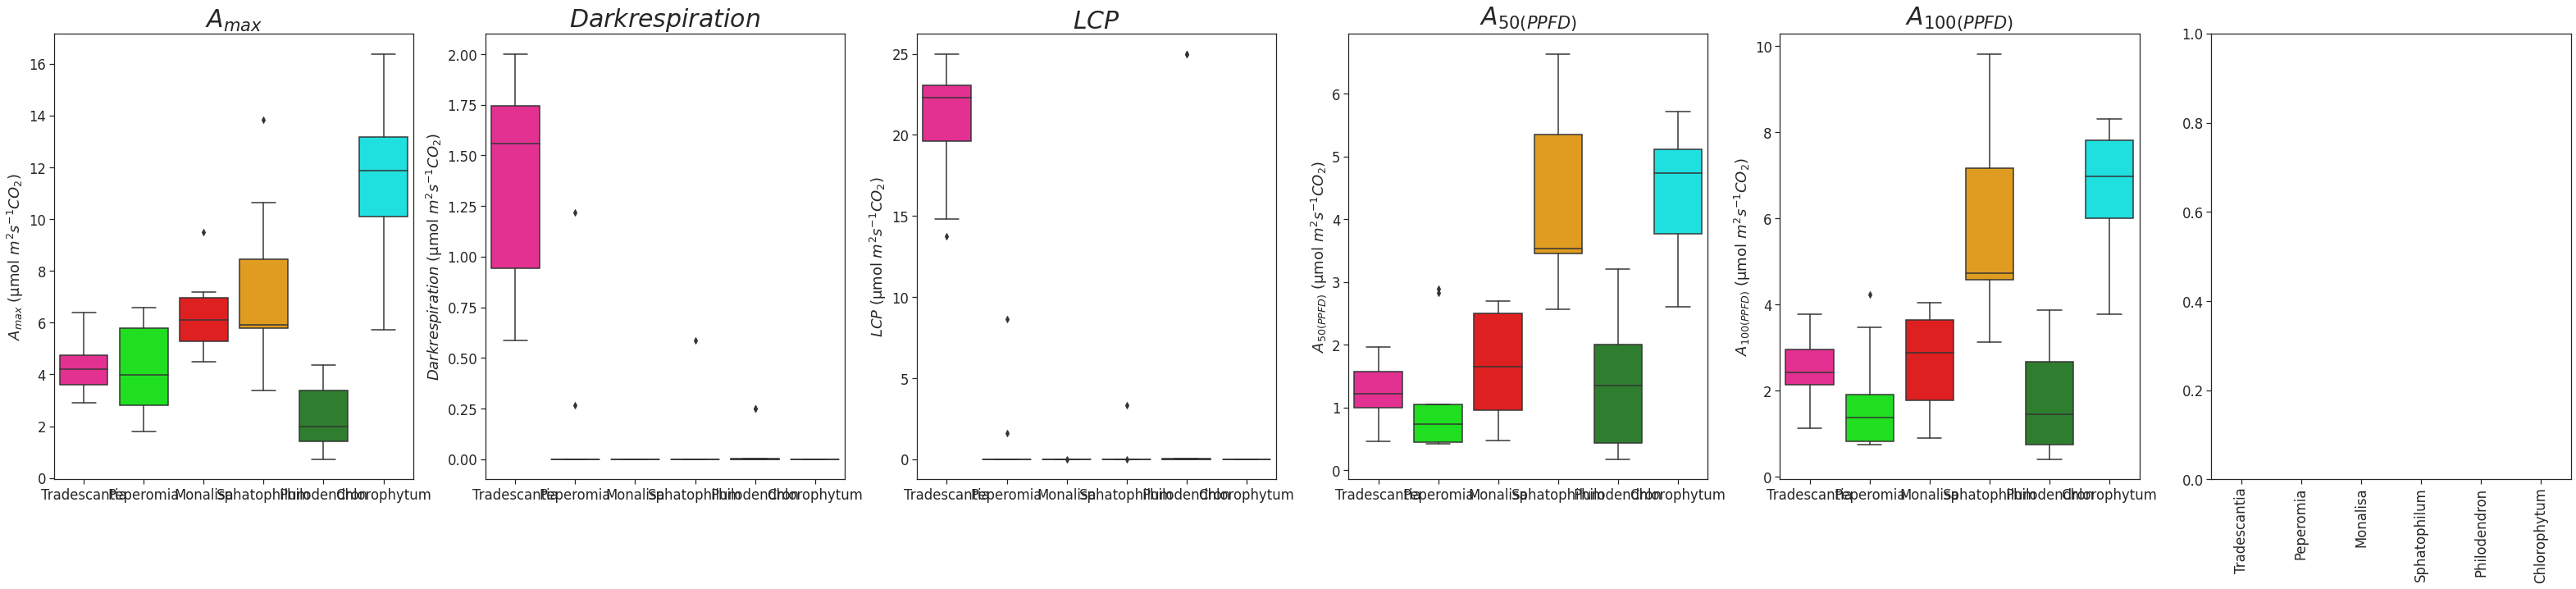

In [ ]:
dict_for_boxplots = {stat_df.columns[1]:"$A_{max}$" , stat_df.columns[2]:"$Dark respiration$", stat_df.columns[3]:"$LCP $", stat_df.columns[4]:"$A_{50 (PPFD)}$", stat_df.columns[5]:"$A_{100 (PPFD)}$"}
ax_dict_boxes = {stat_df.columns[1]: 0, stat_df.columns[2]: 1, stat_df.columns[3]: 2, stat_df.columns[4]: 3, stat_df.columns[5]: 4, stat_df.columns[6]:5 }
fig, axes = plt.subplots(1, 6,sharex=True, figsize=(55,10))
for column in stat_df.columns[1:6]:
  # plt.subplots(1, figsize=(7,5))
  a = sns.boxplot(ax=axes[ax_dict_boxes[column]], data=stat_df, x='species', y=column,palette =colors_dict )
  a.set_ylabel(dict_for_boxplots[column]+" (µmol $m^2 s^{-1} CO_2$)")
  a.set_xlabel(" ")
  a.set_title(dict_for_boxplots[column],fontsize = 30)
  plt.xticks(rotation=90)

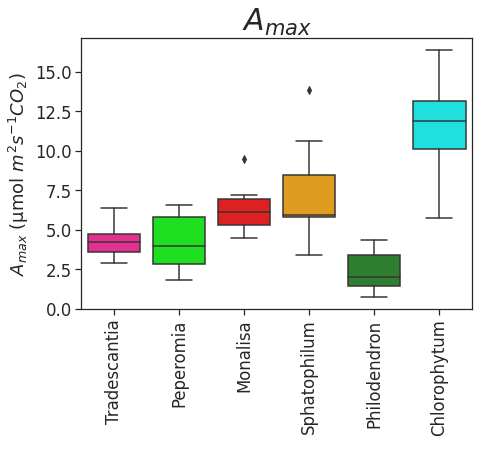

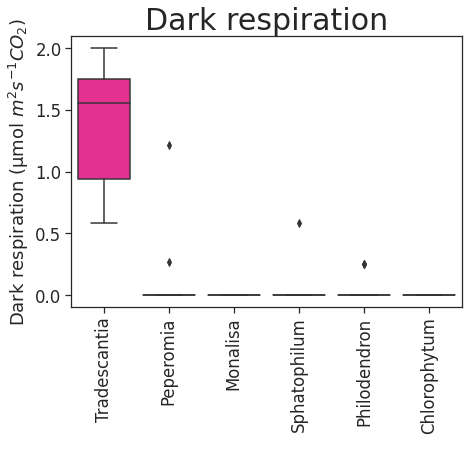

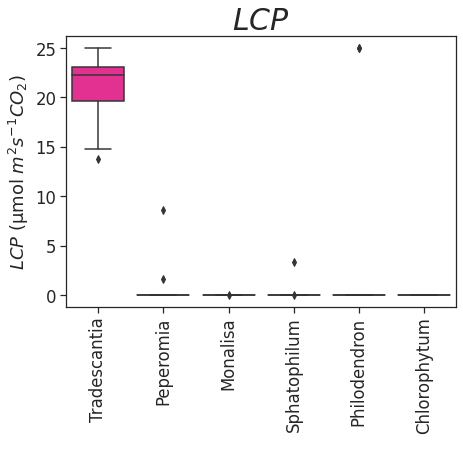

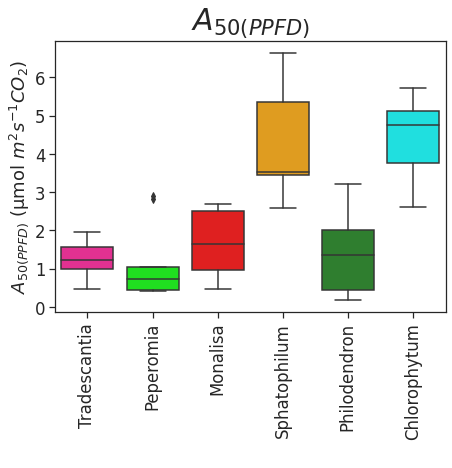

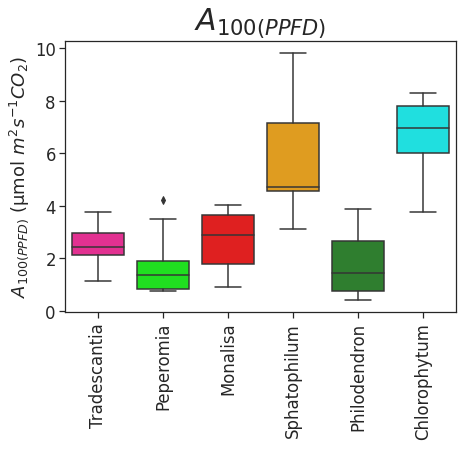

In [ ]:
# present in boxplots:
# 1 - replace tp float
for column in stat_df.columns[1:6]:
    stat_df[column] = stat_df[column].astype('float')

# dict dor axes
dict_for_boxplots = {stat_df.columns[1]:"$A_{max}$" , stat_df.columns[2]:"Dark respiration", stat_df.columns[3]:"$LCP $", stat_df.columns[4]:"$A_{50 (PPFD)}$", stat_df.columns[5]:"$A_{100 (PPFD)}$"}
# Boxplots
for column in stat_df.columns[1:6]:
  plt.subplots(1, figsize=(7,5))
  a = sns.boxplot( data=stat_df, x='species', y=column,palette =colors_dict )
  a.set_ylabel(dict_for_boxplots[column]+" (µmol $m^2 s^{-1} CO_2$)")
  a.set_xlabel(" ")
  a.set_title(dict_for_boxplots[column],fontsize = 30)
  plt.xticks(rotation=90)

  save_to = "/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/Figures/"
  plt.savefig(save_to +str(column)+ "boxplot.png",bbox_inches = "tight")

In [ ]:
stat_df.to_excel("/content/drive/Othercomputers/My Computer/Desktop/Greenwall/Light_curve/new_exp_03_2022/stats_file.xlsx")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### df for Avg and STD

In [ ]:
# df_A_Avg = pd.DataFrame()
# df_A_Avg1 = pd.DataFrame()
# df_A_Avg["50"] =df.loc[50]
# df_A_Avg["100"] =df.loc[100]
# df_A_Avg = df_A_Avg.T
# for plant_name in species:
#     df_A_Avg1[plant_name + '_avg'] =df_A_Avg[[column for column in df_A_Avg.columns if plant_name in column]].mean(axis=1)
#     df_A_Avg1[plant_name + '_std'] =df_A_Avg[[column for column in df_A_Avg.columns if plant_name in column]].std(axis=1)
# df_A_Avg1

,Tradescantia_avg,Tradescantia_std,Peperomia_avg,Peperomia_std,Monalisa_avg,Monalisa_std,Philodendron_avg,Philodendron_std,Chlorophytum_avg,Chlorophytum_std,Sphatophilum_avg,Sphatophilum_std
50,1.269474,0.450540,1.128480,1.005678,1.662366,0.940759,1.386136,1.022994,4.414312,1.158497,4.246210,1.404445
100,2.486072,0.768213,1.740937,1.274830,2.669384,1.262402,1.792808,1.201945,6.636596,1.671082,5.789912,2.220216


#### Anova

In [ ]:
# ANOVA code  - not usful now
import numpy as np
import pandas as pd
import scipy.stats as sps

# populate a list with all
# values of unique plants
values = []
for plant in stat_df["species"].unique():
    _df = stat_df[stat_df.species==plant]
    values.append(_df["50"].values)

# compute the ANOVA
# with starred *list
# as arguments
sps.f_oneway(*values)

F_onewayResult(statistic=17.30662120201766, pvalue=2.8362596905792857e-09)

###Tucky

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=stat_df['50'],
                          groups=stat_df['species'],
                          alpha=0.05)

#display results
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
Chlorophytum     Monalisa  -2.7519 0.001 -4.5361 -0.9678   True
Chlorophytum    Peperomia  -3.2858 0.001 -4.9145 -1.6571   True
Chlorophytum Philodendron  -3.0282 0.001 -4.6569 -1.3995   True
Chlorophytum Sphatophilum  -0.1681   0.9 -1.7968  1.4606  False
Chlorophytum Tradescantia  -3.1448 0.001 -4.7735 -1.5162   True
    Monalisa    Peperomia  -0.5339   0.9 -2.1626  1.0948  False
    Monalisa Philodendron  -0.2762   0.9 -1.9049  1.3525  False
    Monalisa Sphatophilum   2.5838 0.001  0.9552  4.2125   True
    Monalisa Tradescantia  -0.3929   0.9 -2.0216  1.2358  False
   Peperomia Philodendron   0.2577   0.9 -1.1991  1.7144  False
   Peperomia Sphatophilum   3.1177 0.001   1.661  4.5745   True
   Peperomia Tradescantia    0.141   0.9 -1.3157  1.5977  False
Philodendron Sphatophilum   2.8601 0.001

#### Present letters of results

In [ ]:
# df to tukey results:
df_tukey = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
df_tukey

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Chlorophytum,Monalisa,-2.7519,0.001,-4.5361,-0.9678,True
1,Chlorophytum,Peperomia,-3.2858,0.001,-4.9145,-1.6571,True
2,Chlorophytum,Philodendron,-3.0282,0.001,-4.6569,-1.3995,True
3,Chlorophytum,Sphatophilum,-0.1681,0.900,-1.7968,1.4606,False
4,Chlorophytum,Tradescantia,-3.1448,0.001,-4.7735,-1.5162,True
5,Monalisa,Peperomia,-0.5339,0.900,-2.1626,1.0948,False
6,Monalisa,Philodendron,-0.2762,0.900,-1.9049,1.3525,False
7,Monalisa,Sphatophilum,2.5838,0.001,0.9552,4.2125,True
8,Monalisa,Tradescantia,-0.3929,0.900,-2.0216,1.2358,False
9,Peperomia,Philodendron,0.2577,0.900,-1.1991,1.7144,False


In [ ]:
import math
import itertools
import string

df_True = df_tukey.loc[df_tukey.reject==True,:]
letters = list(string.ascii_lowercase)
n = 0

group1_list = df_True.group1.tolist() #get the groups from the df with only True (True df) to a list
group2_list = df_True.group2.tolist()
group3 = group1_list+group2_list #concat both lists
group4 = list(set(group3)) #get unique items from the list
group5 = [str(i) for i in group4 ] #convert unicode to a str
group5.sort() #sort the list

gen = ((i, 0) for i in group5) #create dict with 0 so the dict won't be empty when starts
dictionary = dict(gen)

group6 = [(group5[i],group5[j]) for i in range(len(group5)) for j in range(i+1, len(group5))] #get all combination pairs
for pairs in group6: #check for each combination if it is present in df_True

    print(n)
    print(dictionary)

    try:
        a = df_True.loc[(df_True.group1==pairs[0])&(df_True.group2==pairs[1]),:] #check if the pair exists in the df

    except:
        a.shape[0] == 0

    if a.shape[0] == 0: #it mean that the df is empty as it does not appear in df_True so this pair is equal

        print ('equal')

        if dictionary[pairs[0]] != 0 and dictionary[pairs[1]] == 0: #if the 1st is populated but the 2nd in not populated
            print ("1st is populated and 2nd is empty")
            dictionary[pairs[1]] = dictionary[pairs[0]]

        elif dictionary[pairs[0]] != 0 and dictionary[pairs[1]] != 0: #if both are populated, check matching labeles
            print ("both are populated")
            if len(list(set([c for c in dictionary[pairs[0]] if c in dictionary[pairs[1]]]))) >0: #check if they have a common label
                    print ("they have a shared character")
            else:
                print ("equal but have different labels")
             #check if the 1st group label doesn't appear in anyother labels, if it is unique then the 2nd group can have the first group label
                m = 0 #count the number of groups that have a shared char with 1st group
                j = 0 #count the number of groups that have a shared char with 2nd group
                for key, value in dictionary.items():
                    if key != pairs[0] and len(list(set([c for c in dictionary[pairs[0]] if c in value])))==0:
                        m+=1
                for key, value in dictionary.items():
                    if key != pairs[1] and len(list(set([c for c in dictionary[pairs[1]] if c in value])))==0:
                        j+=1
                if m == len(dictionary)-1 and j == len(dictionary)-1: #it means that this value is unique because it has no shared char with another group
                    print ("unique")
                    dictionary[pairs[1]] = dictionary[pairs[0]][0]

                else:
                    print ("there is at least one group in the dict that shares a char with the 1st group")
                    dictionary[pairs[1]] = dictionary[pairs[1]] + dictionary[pairs[0]][0]


        else:  # if it equals 0, meaning if the 1st is empty (which means that the 2nd must be also empty)
            print ("both are empty")
            dictionary[pairs[0]] = letters[n]
            dictionary[pairs[1]] = letters[n]

    else:

        print ("not equal")

        if dictionary[pairs[0]] != 0: # if the first one is populated (has a value) then give a value only to the second 

            print ('1st is populated')
            # if the 2nd is not empty and they don't share a charcter then no change is needed as they already have different labels
            if dictionary[pairs[1]] != 0 and len(list(set([c for c in dictionary[pairs[0]] if c in dictionary[pairs[1]]]))) == 0:
                print ("no change")

            elif dictionary[pairs[1]] == 0: #if the 2nd is not populated give it a new letter
                dictionary[pairs[1]] = letters[n+1]

            #if the 2nd is populated and equal to the 1st, then change the letter of the 2nd to a new one and assign its original letter to all the others that had the same original letter       
            elif  dictionary[pairs[1]] != 0 and len(list(set([c for c in dictionary[pairs[0]] if c in dictionary[pairs[1]]]))) > 0:
                #need to check that they don't share a charcter
                print ("need to add a letter")
                original_value = dictionary[pairs[1]]
                dictionary[pairs[1]] = letters[n]
                for key, value in dictionary.items():
                    if key != pairs[0] and len(list(set([c for c in original_value if c in value])))>0: #for any given value, check if it had a character from the group that will get a new letter, if so, it means  that they are equal and thus the new letter should also appear in the value of the "old" group 
                        dictionary[key] = original_value + letters[n]  #add the original letter of the group to all the other groups it was similar to               

        else:

            print ('1st is empty')
            dictionary[pairs[0]] = letters[n]
            dictionary[pairs[1]] = letters[n+1]
            print (dictionary)
        n+=1

# get the letter out the dictionary

labels = list(dictionary.values())
labels1 = list(set(labels))
labels1.sort()
final_label = ''.join(labels1)

df2=pd.concat([df_tukey.group1,df_tukey.group2])
group_names=df2.unique()
for GroupName in group_names:
    if GroupName in dictionary:
        print ("already exists")
    else:
        dictionary[str(GroupName)] = final_label

for key, value in dictionary.items(): #this keeps only the unique char per group and sort it by group
    dictionary[key] =  ''.join(set(value))

dict2 = dict(sorted(dictionary.items())) # the final output

0
{'Chlorophytum': 0, 'Monalisa': 0, 'Peperomia': 0, 'Philodendron': 0, 'Sphatophilum': 0, 'Tradescantia': 0}
not equal
1st is empty
{'Chlorophytum': 'a', 'Monalisa': 'b', 'Peperomia': 0, 'Philodendron': 0, 'Sphatophilum': 0, 'Tradescantia': 0}
1
{'Chlorophytum': 'a', 'Monalisa': 'b', 'Peperomia': 0, 'Philodendron': 0, 'Sphatophilum': 0, 'Tradescantia': 0}
not equal
1st is populated
2
{'Chlorophytum': 'a', 'Monalisa': 'b', 'Peperomia': 'c', 'Philodendron': 0, 'Sphatophilum': 0, 'Tradescantia': 0}
not equal
1st is populated
3
{'Chlorophytum': 'a', 'Monalisa': 'b', 'Peperomia': 'c', 'Philodendron': 'd', 'Sphatophilum': 0, 'Tradescantia': 0}
equal
1st is populated and 2nd is empty
3
{'Chlorophytum': 'a', 'Monalisa': 'b', 'Peperomia': 'c', 'Philodendron': 'd', 'Sphatophilum': 'a', 'Tradescantia': 0}
not equal
1st is populated
4
{'Chlorophytum': 'a', 'Monalisa': 'b', 'Peperomia': 'c', 'Philodendron': 'd', 'Sphatophilum': 'a', 'Tradescantia': 'e'}
equal
both are populated
equal but have diff